In [1]:
from model import GNNFingerprint3D
from dataset import MoleculeGraphDataset
from train import train
from config import FINAL_DF_DICT_PATH, SIMILAR_MOL_PATH

import torch
import pickle
import os
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = os.getenv("DATA_PATH")

with open(FINAL_DF_DICT_PATH, "rb") as f:
    final_df = pickle.load(f)

dataset = MoleculeGraphDataset(SIMILAR_MOL_PATH, final_df, batch_size=512)

# Model
model = GNNFingerprint3D(node_input_dim=13, edge_input_dim=5)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Training
losses = train(model, dataset, optimizer, device, model_name="GNN_MUCH_MORE_WEIGHT_3D", epochs=10)

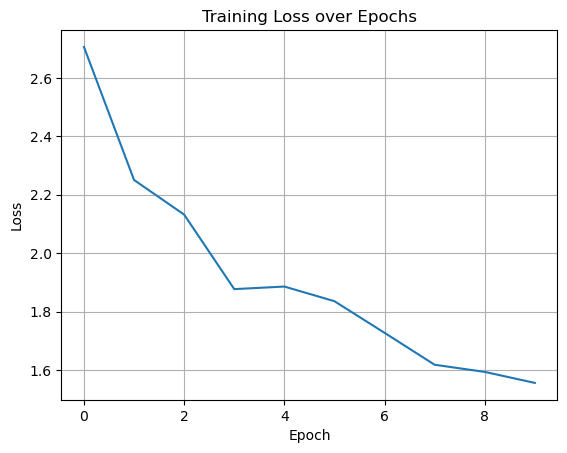

In [4]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()